<a href="https://colab.research.google.com/github/franciscogonzalez-gal/statistical-learning-2/blob/main/Tarea_1_Statistical_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de Trabajo 1

**Nombre:** Francisco González

**Carnet:** 24002914

## Librerías y generación de datos

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Dataset simulado
from sklearn.datasets import make_classification

# Simular datos para clasificación binaria
X, y = make_classification(n_samples=1500, n_features=20, n_informative=10, n_redundant=5,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Escalado
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Construcción del modelo base

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# Modelo base corregido
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))



## Compilación del modelo

In [ ]:
# Compilación
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## Entrenamiento con EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenamiento
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 0.7422 - val_accuracy: 0.5542 - val_loss: 0.7030
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5993 - loss: 0.6550 - val_accuracy: 0.6625 - val_loss: 0.6307
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 0.5861 - val_accuracy: 0.7292 - val_loss: 0.5742
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7450 - loss: 0.5584 - val_accuracy: 0.7625 - val_loss: 0.5243
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.4981 - val_accuracy: 0.7833 - val_loss: 0.4862
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8045 - loss: 0.4734 - val_accuracy: 0.8000 - val_loss: 0.4500
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.4295 - val_accuracy: 0.8083 - val_loss: 0.4195
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4233 - val_accuracy: 0.8375 - 

## Evaluación del modelo base

In [ ]:
# Evaluación en datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Métricas adicionales
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.1780 
Test Accuracy: 0.9233
Test Loss: 0.2217
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.93      0.91      0.92       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion Matrix:
[[139  10]
 [ 13 138]]


## Visualización del historial de entrenamiento

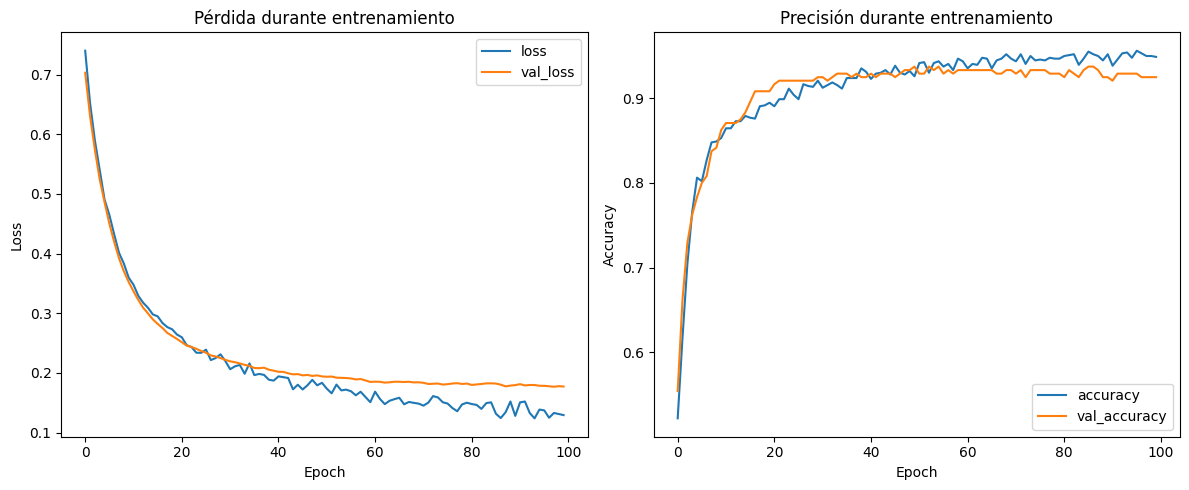

In [ ]:
import matplotlib.pyplot as plt

# Gráfica de pérdida y precisión
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Pérdida durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Precisión durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Creación de modelos adicionales

In [ ]:
def create_model(hidden_layers, neurons_per_layer, dropout_rate):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Especificaciones de los cinco modelos adicionales
model_configs = [
    {'hidden_layers': 2, 'neurons': 32, 'dropout': 0.2},
    {'hidden_layers': 3, 'neurons': 64, 'dropout': 0.3},
    {'hidden_layers': 2, 'neurons': 128, 'dropout': 0.4},
    {'hidden_layers': 1, 'neurons': 64, 'dropout': 0.0},
    {'hidden_layers': 3, 'neurons': 32, 'dropout': 0.1},
]

models = []
histories = []

for config in model_configs:
    print(f"Entrenando modelo con {config}")
    m = create_model(config['hidden_layers'], config['neurons'], config['dropout'])
    h = m.fit(X_train, y_train,
              validation_split=0.2,
              epochs=100,
              callbacks=[early_stop],
              verbose=0)
    models.append(m)
    histories.append(h)


Entrenando modelo con {'hidden_layers': 2, 'neurons': 32, 'dropout': 0.2}
Entrenando modelo con {'hidden_layers': 3, 'neurons': 64, 'dropout': 0.3}
Entrenando modelo con {'hidden_layers': 2, 'neurons': 128, 'dropout': 0.4}
Entrenando modelo con {'hidden_layers': 1, 'neurons': 64, 'dropout': 0.0}
Entrenando modelo con {'hidden_layers': 3, 'neurons': 32, 'dropout': 0.1}


## Comparación de val_accuracy y val_loss entre los seis modelos

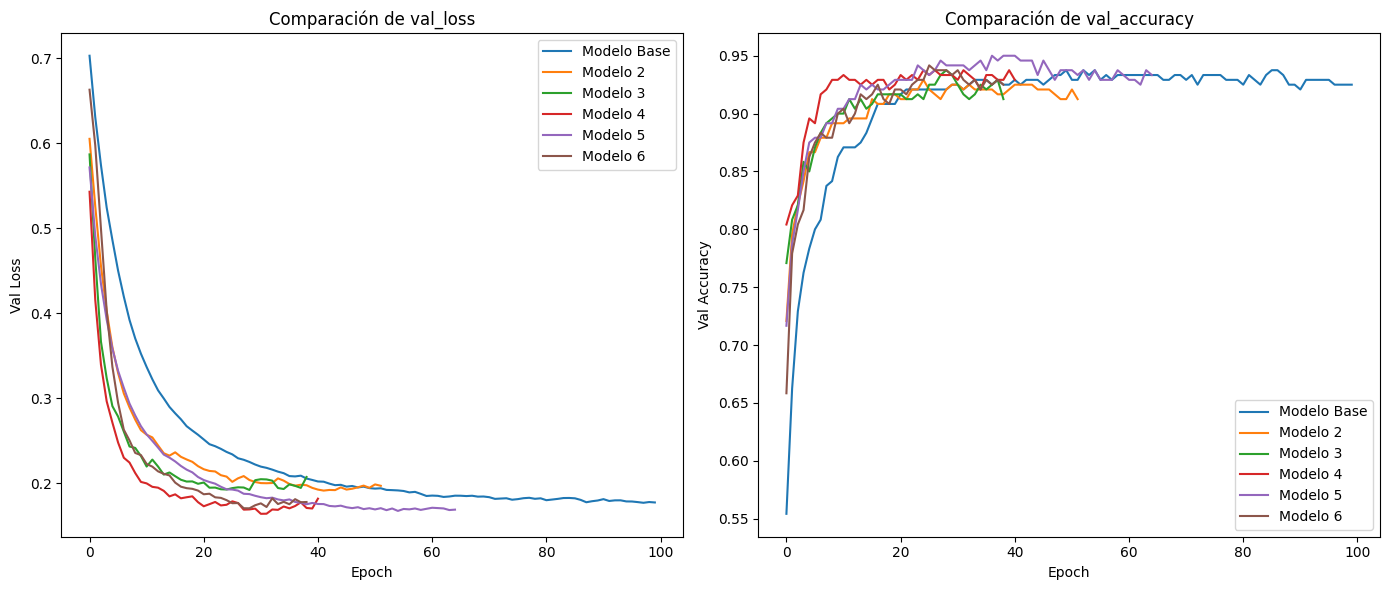

In [ ]:
# Incluir el modelo base al inicio de la lista
all_histories = [history] + histories
model_names = ['Modelo Base'] + [f'Modelo {i+1}' for i in range(1, 6)]

# Gráfica de val_loss y val_accuracy
plt.figure(figsize=(14, 6))

# val_loss
plt.subplot(1, 2, 1)
for h, name in zip(all_histories, model_names):
    plt.plot(h.history['val_loss'], label=name)
plt.title('Comparación de val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend()

# val_accuracy
plt.subplot(1, 2, 2)
for h, name in zip(all_histories, model_names):
    plt.plot(h.history['val_accuracy'], label=name)
plt.title('Comparación de val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Extraer última val_accuracy de cada modelo
val_accuracies = [h.history['val_accuracy'][-1] for h in all_histories]
summary_df = pd.DataFrame({
    'Modelo': model_names,
    'Val_Accuracy_Final': val_accuracies
})

print("Resumen de precisión final por modelo:")
print(summary_df)


Resumen de precisión final por modelo:
        Modelo  Val_Accuracy_Final
0  Modelo Base            0.925000
1     Modelo 2            0.912500
2     Modelo 3            0.912500
3     Modelo 4            0.929167
4     Modelo 5            0.933333
5     Modelo 6            0.925000


### Reflexión final

**¿Qué arquitectura funcionó mejor y por qué?**  
El **Modelo 5**, con **1 capa oculta, 64 neuronas y sin Dropout**, alcanzó la mayor precisión de validación (**0.9333**), superando al resto de los modelos evaluados. Esto sugiere que, para este conjunto de datos, una arquitectura simple pero con un número considerable de neuronas es suficiente para capturar los patrones relevantes, sin necesidad de aplicar regularización adicional.

**¿Cómo impactó el Dropout en el resultado?**  
La inclusión de Dropout no aportó mejoras y, en algunos casos, redujo el desempeño de los modelos. Esto indica que los datos y la complejidad del problema no presentaron un riesgo elevado de sobreajuste, permitiendo que el modelo sin Dropout aprovechara toda la capacidad de sus neuronas para obtener una mejor precisión.

**¿Qué aprendí sobre la optimización usando EarlyStopping?**  
EarlyStopping permitió detener el entrenamiento cuando la pérdida de validación dejó de mejorar, evitando sobreentrenamiento y ahorrando tiempo de cómputo. Esto garantizó que el modelo final conservara los pesos correspondientes a su mejor desempeño en validación.

**¿Qué ajustes harías si tuvieras más datos o más clases?**  
- Con más datos: se podrían probar arquitecturas más profundas o añadir Dropout únicamente si aparece sobreajuste, así como evaluar Batch Normalization para mejorar la estabilidad del entrenamiento.  
- Con más clases: cambiar la capa de salida a una activación *softmax*, usar `categorical_crossentropy` como función de pérdida y ajustar la red para manejar mayor complejidad en la clasificación.
